# Anscombe's Quartet Analysis

**Anscombe's Quartet** is a set of four datasets constructed by statistician Francis Anscombe in 1973. Each dataset has nearly identical summary statistics (mean, variance, correlation, and regression line), yet they look completely different when visualized.

This notebook demonstrates why visualizing data is essential — not just computing statistics.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load Anscombe's Quartet from seaborn
df = sns.load_dataset('anscombe')
print('Dataset shape:', df.shape)
df.head(12)

Dataset shape: (44, 3)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## Summary Statistics

Computing mean, variance, correlation, regression slope/intercept, and R² for each of the four groups.

In [2]:
records = []

for dataset, group in df.groupby('dataset'):
    x = group['x']
    y = group['y']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    records.append({
        'Dataset': dataset,
        'Mean X':    round(x.mean(), 4),
        'Mean Y':    round(y.mean(), 4),
        'Var X':     round(x.var(ddof=1), 4),
        'Var Y':     round(y.var(ddof=1), 4),
        'Correlation': round(r_value, 4),
        'Slope':     round(slope, 4),
        'Intercept': round(intercept, 4),
        'R²':        round(r_value**2, 4),
    })

stats_df = pd.DataFrame(records).set_index('Dataset')

stats_df.style.set_caption('Summary Statistics — Anscombe\'s Quartet') \
              .format(precision=4) \
              .background_gradient(cmap='Blues', axis=0)

,Mean X,Mean Y,Var X,Var Y,Correlation,Slope,Intercept,R²
Dataset,,,,,,,,
I,9.0000,7.5009,11.0000,4.1273,0.8164,0.5001,3.0001,0.6665
II,9.0000,7.5009,11.0000,4.1276,0.8162,0.5000,3.0009,0.6662
III,9.0000,7.5000,11.0000,4.1226,0.8163,0.4997,3.0025,0.6663
IV,9.0000,7.5009,11.0000,4.1232,0.8165,0.4999,3.0017,0.6667


## Comparing Means and Variances Across Groups

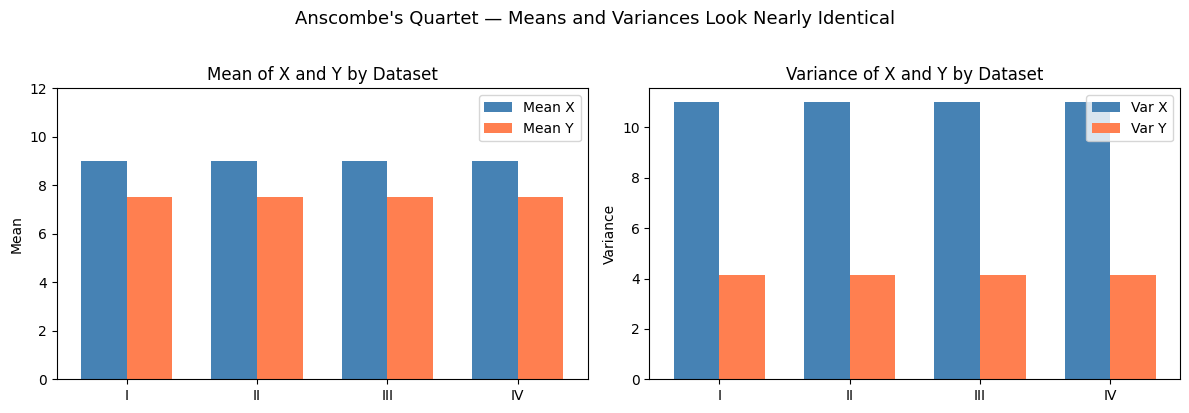

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

datasets = stats_df.index.tolist()
x_pos = np.arange(len(datasets))
width = 0.35

# Means
ax = axes[0]
ax.bar(x_pos - width/2, stats_df['Mean X'], width, label='Mean X', color='steelblue')
ax.bar(x_pos + width/2, stats_df['Mean Y'], width, label='Mean Y', color='coral')
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets)
ax.set_title('Mean of X and Y by Dataset')
ax.set_ylabel('Mean')
ax.legend()
ax.set_ylim(0, 12)

# Variances
ax = axes[1]
ax.bar(x_pos - width/2, stats_df['Var X'], width, label='Var X', color='steelblue')
ax.bar(x_pos + width/2, stats_df['Var Y'], width, label='Var Y', color='coral')
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets)
ax.set_title('Variance of X and Y by Dataset')
ax.set_ylabel('Variance')
ax.legend()

plt.suptitle("Anscombe's Quartet — Means and Variances Look Nearly Identical", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

## Scatter Plots with Regression Lines

Each panel shows the raw data and its fitted linear regression line.

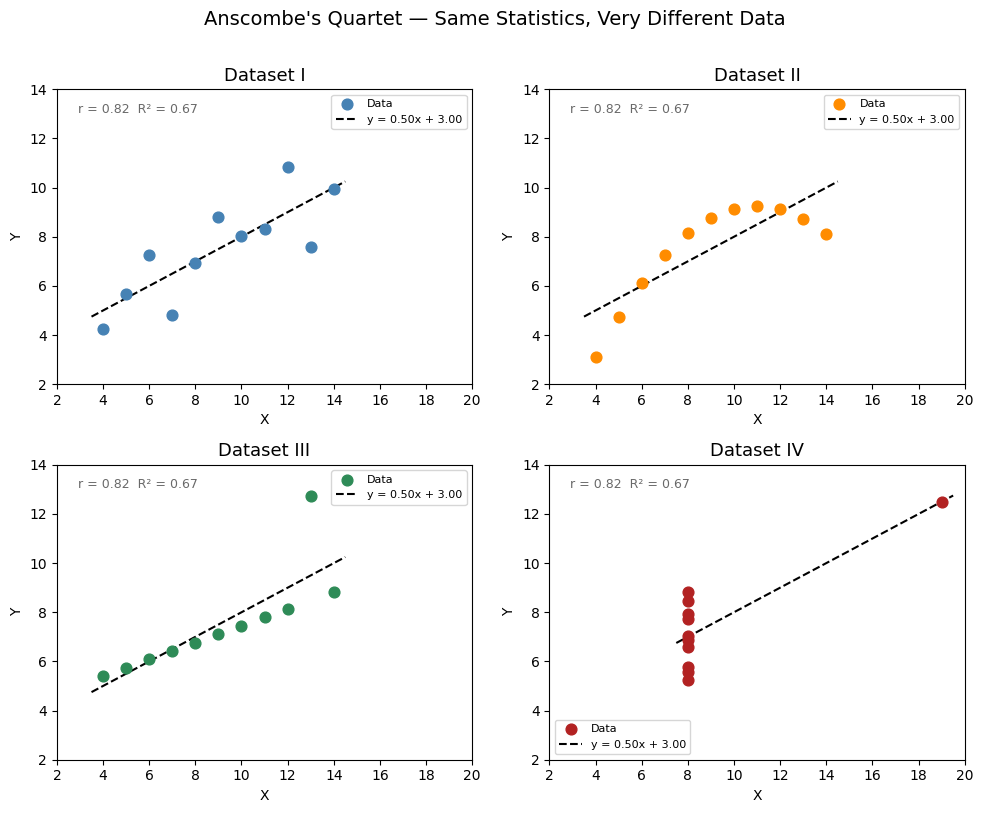

In [4]:
datasets = df['dataset'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

colors = ['steelblue', 'darkorange', 'seagreen', 'firebrick']

for i, (dataset, color) in enumerate(zip(datasets, colors)):
    group = df[df['dataset'] == dataset]
    x = group['x']
    y = group['y']

    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    x_line = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
    y_line = slope * x_line + intercept

    ax = axes[i]
    ax.scatter(x, y, color=color, s=60, zorder=3, label='Data')
    ax.plot(x_line, y_line, color='black', linewidth=1.5, linestyle='--', label=f'y = {slope:.2f}x + {intercept:.2f}')
    ax.set_title(f'Dataset {dataset}', fontsize=13)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(fontsize=8)
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)
    ax.text(0.05, 0.92, f'r = {r_value:.2f}  R² = {r_value**2:.2f}',
            transform=ax.transAxes, fontsize=9, color='dimgray')

plt.suptitle("Anscombe's Quartet — Same Statistics, Very Different Data", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## Interpretation

All four datasets share nearly identical summary statistics:

| Statistic | Value |
|-----------|-------|
| Mean of X | ≈ 9.0 |
| Mean of Y | ≈ 7.5 |
| Variance of X | ≈ 11.0 |
| Variance of Y | ≈ 4.12 |
| Correlation | ≈ 0.816 |
| Regression line | y ≈ 0.5x + 3 |
| R² | ≈ 0.67 |

Yet the scatter plots reveal four structurally different relationships:

- **Dataset I** — A clean linear relationship with some noise. Linear regression is appropriate.
- **Dataset II** — A curved (quadratic) relationship. A linear model is a poor fit; a polynomial regression would be better.
- **Dataset III** — A perfect linear relationship except for one high-leverage outlier that skews the slope.
- **Dataset IV** — All X values are identical except one extreme point, which entirely drives the regression. The regression line is meaningless here.

**Takeaway:** Summary statistics alone can be deeply misleading. Always visualize your data before drawing conclusions.